# Si sólo aprendes un modelo, aprende este: Regresión Lineal

La regresión es la base de los modelos de inferencia causal.

Hay una razón por la que todos los libros de econometría y de ciencia de datos lo cubren. Se trata del modelo por el que debes comenzar **antes de explorar** modelos más complejos.

No hay nada de malo en usar redes neuronales o modelos de random forest en tu proyecto, pero si usar regresión lineal, tus modelos tendrán los siguientes beneficios.

- Más parsimonia. Entre más simple es el modelo, menos problemas te va a causar.
- Serán más interpretables. Los modelos más complejos tienen el problema de que son mas difíciles de interpretar. Si necesitas comunicar tus resultados a un jefe o un cliente, necesitas poder decir claramente la interpretación y las limitaciones.
- Pruebas de robustez. Cuando un modelo pasa pruebas y demuestra que es robusto, podrás tener más confianza de usarlo en tus predicciones.

No es magia. Hay teoremas muy sólidos que ayudan a que entendamos lo que funciona y cuándo funciona.

De esto se trata este capítulo.

<video controls src="../../videos/only-regression.mov" width="560" height="315"></video>

## El modelo de mínimos cuadrados ordinarios

Comencemos con el modelo básico. Tienes una variable $X$ y deseas conocer el efecto que tiene $Y$ sobre ella. La variable $X$ podrían ser gastos en una campaña publicitaria por Televisión, mientras que $Y$ son las ventas de nuestro producto.

Si tienes suficientes combinaciones de las dos variables, puedes plantear un modelo sobre su comportamiento. Usaremos la base de datos de publicidad, disponible libremente en [kaggle.com](http://kaggle.com). El siguiente código carga la base de datos y muestra un diagrama de dispersión entre los gastos en publicidad por TV y las ventas en millones de unidades.

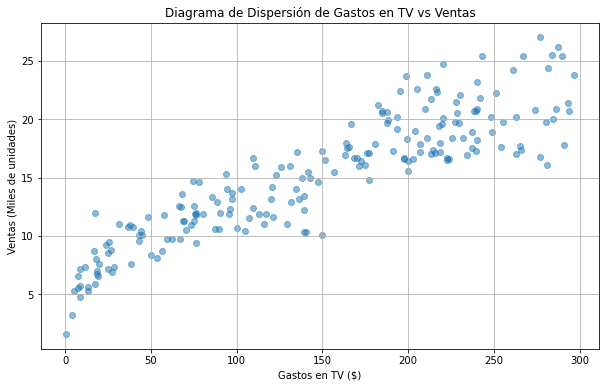

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
data = pd.read_csv('../../../data/04-Regresion/advertising.csv')

# Crear un diagrama de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(data['TV'], data['Sales'], alpha=0.5)
plt.title('Diagrama de Dispersión de Gastos en TV vs Ventas')
plt.xlabel('Gastos en TV ($)')
plt.ylabel('Ventas (Miles de unidades)')
plt.grid(True)
plt.show()

Este es un ejemplo muy claro donde la regresión lineal es el modelo ideal para nosotros. 

Lo que nos dice la regresión lineal es que existe una línea que se ajusta a los datos. No necesitamos que el ajuste sea perfecto. Si tuviéramos un ajuste perfecto no necesitaríamos de modelos estadísticos. Es normal pensar que hay muchos factores que afectan las ventas además del gasto publicitario, desde el clima hasta el día del mes pueden generar variaciones. Todos reaccionamos diferente a la publicidad.

Veamos cómo se ve nuestra línea de regresión.

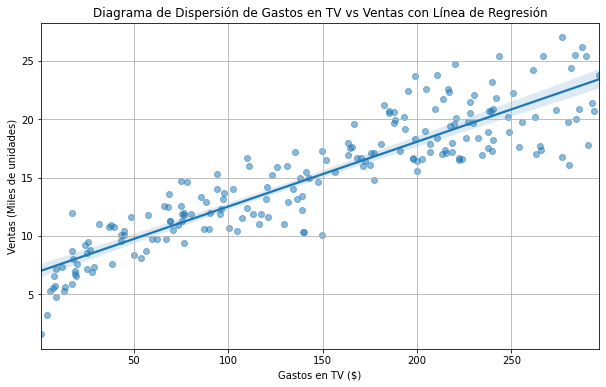

In [2]:
import seaborn as sns

# Crear un diagrama de dispersión con una línea de regresión
plt.figure(figsize=(10, 6))
sns.regplot(x='TV', y='Sales', data=data, scatter_kws={'alpha':0.5})
plt.title('Diagrama de Dispersión de Gastos en TV vs Ventas con Línea de Regresión')
plt.xlabel('Gastos en TV ($)')
plt.ylabel('Ventas (Miles de unidades)')
plt.grid(True)

Este tipo de línea se genera con un modelo lineal, donde cada punto es producto de la función

$$
Y_i = \beta_0 + \beta_1 X_i + \varepsilon_i
$$

El punto $i$ se ubica en la coordenada $(X_i,Y_i)$. El término $\varepsilon_i$ es el **error**, la diferencia entre el punto y la línea. Los términos $\beta_0$ y $\beta_1$ (se lee *beta-cero* y *beta-uno*) son los parámetros de una función lineal. Usamos letras griegas por convención, y el subíndice cero y uno son una forma práctica de preparar nuestro modelo en caso de que tengamos que usar más parámetros.

El siguiente es un **diagrama de dispersión**.

Nota que en algunos puntos, la línea de regresión “se equivoca” hacia arriba y en otros puntos hacia abajo. Cada punto que compone la línea de regresión es una predicción del valor de $Y_i$ dado $X_i$, donde $\varepsilon_i$ es la diferencia, a la que llamamos el **residual**.

![Errores](../../figures/errores.png)

El modelo lineal tiene la ventaja de que sólo con dos parámetros podemos definir toda la línea.

Si $\beta_0 = 6.97$ y $\beta_1 = 0.0555$, entonces un valor de $X_i = \$150$ en gasto de publicidad por TV implica ventas por $90.22$. De hecho, puedes crear una calculadora sencilla en python para que te muestre el valor de las ventas que corresponde a cualquier gasto en TV.

In [3]:
# Crear la función
def sales(tv):
	b0 = 6.97
	b1 = 0.0555
	return b0 + b1 * tv

# Comprobar el resultado con 150
sales(150)

15.294999999999998

Podríamos hacer una predicción de Y para cada punto X. Si tu regresión es correcta y la muestra es buena, puedes usar la función para valores de X que no están en tu base de datos. Por ejemplo, este modelo predice que un gasto de publicidad en TV de $450 traerá ventas por 31.945 miles de unidades.

## Mínimos cuadrados ordinarios

Ya conoces el modelo de regresión lineal, ahora te presento el mejor modelo para resolverlo.

Mínimos cuadrados ordinarios (OLS = Ordinary Least Squares) es el método más popular para resolver el modelo de regresión lineal. Se prefiere porque es simple y muy eficiente.

Bajo ciertas condiciones, OLS se considera el mejor estimador lineal insesgado. El acrónimo en inglés es BLUE (Best Linear Unbiased Estimator):

- Best (Mejor): Significa que tiene la menor varianza de las estimaciones.
- Linear (Lineal): El estimador es una función lineal de los valores observados.
- Unbiased (Insesgados): El estimador *le atina* al verdadero valor del parámetro **en promedio**.
- Estimator (Estimador): Es la regla o fórmula que indica cómo estimar los parámetros del modelo.

OLS es una de muchas técnicas que se pueden utilizar para resolver el modelo. Tiene el objetivo de encontrar los valores de $\beta_0$ y $\beta_1$ que minimizan la suma de los errores al cuadrado. La siguiente imagen muestra cómo se extiende el área de los errores al cuadrado.
![Errores2](../../figures/errores2.png)
La imagen solo muestra el cuadrado de dos puntos. Si pudiéramos mover con libertad los valores de $\beta_0$ y $\beta_1$, podíamos ver cómo esos cuadros se hacer más grandes y más chicos, de acuerdo a la distancia con los puntos.

¿Cómo encontramos los valores de $\beta_0$ y $\beta_1$ que hacen mínima la suma de los residuales al cuadrado?

### Obteniendo los estimadores de OLS

Pasemos la ecuación a notación vectorial, de esta forma nuestra solución aplicará para modelos con $k$ parámetros.

- Sea $\mathbf{y}$ el vector de observaciones de tamaño $n\times 1$ de la variable dependiente (las ventas, en nuestro ejemplo).
- Sea $\mathbf{X}$ una matriz de tamaño $n\times k$ con las observaciones de $k$ variables independientes con $n$ observaciones cada una. Cómo por lo general nuestro modelo contiene un término constante, incluimos una columna de unos.
- Sea $\boldsymbol{\beta}$ un vector de tamaño $k\times 1$. Es el vector de los parámetros que deseamos estimar.
- Sea $\boldsymbol{\varepsilon}$ un vector de tamaño $k\times 1$. Es el vector de errores.

Nuestro modelo se vería entonces de la siguiente manera

$$
\begin{bmatrix}Y_1 \\Y_2 \\\vdots \\Y_n\end{bmatrix}_{n \times 1}=\begin{bmatrix}1 & X_{11} & X_{21} & \cdots & X_{k1} \\1 & X_{12} & X_{22} & \cdots & X_{k2} \\\vdots & \vdots & \vdots & \ddots & \vdots \\1 & X_{1n} & X_{2n} & \cdots & X_{kn}\end{bmatrix}_{n \times k}\begin{bmatrix}\beta_1 \\\beta_2 \\\vdots \\\beta_k\end{bmatrix}_{k \times 1}+\begin{bmatrix}\epsilon_1 \\\epsilon_2 \\\vdots \\\epsilon_n\end{bmatrix}_{n \times 1}
$$

Que se puede simplificar a

$$
\begin{equation}\mathbf{y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\varepsilon}\end{equation}
$$

Este es el modelo que refleja los datos en la vida real en una población. Es muy raro que tengamos todos los datos de la vida real, generalmente trabajamos con una **muestra** y lo que obtenemos es una estimación.

- Sea $\boldsymbol{\hat{\beta}}$ el vector de estimaciones de los parámetros de la población, bajo el supuesto de que $E[\boldsymbol{\hat{\beta}}] = \boldsymbol{\beta}$.
- Sea $\mathbf{e}$ el vector de residuales. Nuestro objetivo en el método de OLS es minimizar $\sum \mathbf{e}_i^2$

La suma de los residuales al cuadrado (RSS = *Residual Sum of Squares*) la expresamos en notación vectorial como $\mathbf{e}’\mathbf{e}$, en el apéndice explico por qué.

Podemos expresar la RSS como

$$
\mathbf{e}’\mathbf{e} = (\mathbf{y}  -\mathbf{X}\boldsymbol{\hat\beta})'(\mathbf{y}  -\mathbf{X}\boldsymbol{\hat\beta}) \\ = \mathbf{y}'\mathbf{y} - \boldsymbol{\hat\beta}'\mathbf{X}'\mathbf{y} - \mathbf{y}'\mathbf{X} \boldsymbol{\hat\beta} + \boldsymbol{\hat{\beta}}'\mathbf{X}' \mathbf{X} \boldsymbol{\hat{\beta}}
$$

Si usamos que $\mathbf{y}'\mathbf{X} \boldsymbol{\hat\beta} = (\mathbf{y}'\mathbf{X} \boldsymbol{\hat\beta})' = \boldsymbol{\hat{\beta}}'\mathbf{X}'\mathbf{y}$, entonces nuestra RSS se verá así

$$
\mathbf{e}'\mathbf{e} = \mathbf{y}'\mathbf{y} - 2 \boldsymbol{\hat{\beta}}'\mathbf{X}' \mathbf{y} + \boldsymbol{\hat{\beta}}' \mathbf{X}'\mathbf{X}\boldsymbol{\hat{\beta}}
$$

Al igual que haríamos con la versión de dos dimensiones, requerimos obtener las condiciones de primer orden de la ecuación para encontrar el mínimo. Esto lo hacemos con la primera derivada con respecto a $\boldsymbol{\hat{\beta}}$. El truco está en igualar esta derivada a cero.

$$
\frac{\partial \mathbf{e}'\mathbf{e}}{\partial \boldsymbol{\hat{\beta}}} = -2 \mathbf{X}' \mathbf{y} + 2 \mathbf{X}'\mathbf{X}\boldsymbol{\hat{\beta}} = 0
$$

Al despejar esta ecuación podemos obtener los valores de $\boldsymbol{\hat\beta}$ que minimizan el valor de los residuales. 

Para comprobar que se trata de un mínimo, notamos que la segunda derivada ($2\mathbf{X}'\mathbf{X}$) es una matriz positiva definida (análoga en álgebra lineal a los números positivos). Incluí algunas notas en el apéndice que te podrán ayudar a entender esto mejor.

De la ecuación anterior podemos obtener las llamadas “ecuación normales”.

$$
(\mathbf{X}'\mathbf{X}) \boldsymbol{\hat{\beta}} = \mathbf{X}'\mathbf{y}
$$

Nota que la matriz $\mathbf{X}'\mathbf{X}$ siempre será cuadrada y simétrica con tamaño $k\times k$. Si la inversa de esta matriz existe (ver el apéndice), la podemos aplicar a ambos lados de la ecuación:

$$
(\mathbf{X}'\mathbf{X})^{-1}(\mathbf{X}'\mathbf{X}) \boldsymbol{\hat{\beta}} = (\mathbf{X}'\mathbf{X})^{-1} \mathbf{X}'\mathbf{y}
$$

y por lo tanto

$$
\boldsymbol{\hat{\beta}} = (\mathbf{X}'\mathbf{X})^{-1} \mathbf{X}'\mathbf{y}
$$

Esto es lo que tu computadora calcula cuando le pides que haga una regresión lineal con tus datos. Nota que no es necesario tener ningún supuesto en este punto, pues tus estimaciones sólo dependen de tu matriz de datos observados. 

Hagamos un ejercicio en python con los datos de publicidad. El siguiente código presenta los datos en forma de matrices y vectores y los aplica para calcular el vector de $\boldsymbol{\hat{\beta}}$:

In [5]:
import numpy as np
import pandas as pd

# Cargar el conjunto de datos
ruta_archivo = '../../../data/04-Regresion/advertising.csv'
datos = pd.read_csv(ruta_archivo)

# Seleccionar solo las columnas TV y Sales
tv = datos['TV'].values
ventas = datos['Sales'].values

# Añadir una columna de unos para el término de intercepto
X = np.column_stack((np.ones(tv.shape[0]), tv))

# Aplicar la fórmula de regresión lineal
# Calcular (X'X)^-1
XX_inv = np.linalg.inv(X.T @ X)

# Calcular (X'X)^-1 X'y
beta_hat = XX_inv @ X.T @ ventas

# Coeficientes: Intercepto y Pendiente
intercepto, pendiente = beta_hat

# Mostrar los resultados
print("Intercepto:", intercepto)
print("Pendiente para TV:", pendiente)

Intercepto: 6.974821488229908
Pendiente para TV: 0.05546477046955883


Lo mejor de este resultado es que es relativamente fácil hacerlo escalar para $k$ variables. Queda como ejercicio para el lector modificar el código anterior. Incluye la publicidad por radio y periódicos a la matrix $\mathbf{X}$ y vuelve a calcular los coeficientes.

### Propiedades de los estimadores de Mínimos Cuadrados

La propiedad principal de los estimadores es que minimizan la suma de los residuales al cuadrado. Pero hay más propiedades que podemos deducir con ligeras modificaciones a nuestra ecuación normal. Por ejemplo, podemos sustituir el valor de $\mathbf{y} = \mathbf{X} \boldsymbol{\hat{\beta}} + \mathbf{e}$ para obtener que:

$$
(\mathbf{X}'\mathbf{X}) \boldsymbol{\hat{\beta}} = \mathbf{X}'(\mathbf{X} \boldsymbol{\hat{\beta}} + \mathbf{e}) \\ (\mathbf{X}'\mathbf{X}) \boldsymbol{\hat{\beta}} = (\mathbf{X}'\mathbf{X}) \boldsymbol{\hat{\beta}} + \mathbf{X}'\mathbf{e} \\ \mathbf{X}'\mathbf{e} = 0
$$

Podemos deducir a partir de este resultado algunas propiedades:

- **Los valores observados de $\mathbf{X}$ no están correlacionados con los residuales.**

Que $\mathbf{X}'\mathbf{e} = 0$ implica que cada columna de la matriz $\mathbf{X}$ tiene correlación muestral de cero con los residuales. Esto sigue siendo verdad aún cuando nuestra regresión incluye una constante.

El siguiente código muestra en python las predicciones, los residuales y el cálculo de la correlación entre ambos. Nota que las predicciones se calculan con el producto de la matriz $\mathbf{X}$ con $\mathbf{\hat{\boldsymbol{\beta}}}$, esto es:

$$
\mathbf{\hat{y}} = \mathbf{X} \mathbf{\hat{\boldsymbol{\beta}}} = \begin{bmatrix}1 & x_{1} \\1 & x_{2} \\\vdots & \vdots \\1 & x_{n}\end{bmatrix}\begin{bmatrix}\hat{\beta}_0 \\\hat{\beta}_1\end{bmatrix}= \begin{bmatrix}\hat{\beta}_0 + \hat{\beta}_1 x_{1} \\\hat{\beta}_0 + \hat{\beta}_1 x_{2} \\\vdots \\\hat{\beta}_0 + \hat{\beta}_1 x_{n}\end{bmatrix}
$$

Los residuales son simplemente $\mathbf{y} -\mathbf{\hat{y}}$.

In [7]:
# Calcular los valores predichos y los residuales
predicciones = X @ beta_hat
residuales = ventas - predicciones

# Calcular la correlación entre los valores observados de TV y los residuales
correlacion = np.corrcoef(tv, residuales)[0, 1]

# Mostrar la correlación
print("Correlación entre los valores observados de TV y los residuales:", correlacion)

Correlación entre los valores observados de TV y los residuales: 7.864091211939043e-16


Un truco para sacar el mayor provecho a este libro: no copies y pegues este código. Cópialo de manera consciente en tu editor. Ejecuta los bloques uno a uno. Si algo te causa dudas, hazlo por partes.

Nota que el coeficiente de correlación es prácticamente cero. Esto comprueba la propiedad.

- **La suma de los residuales es igual a cero.**

Usemos el cálculo que hicimos de los residuales en la propiedad anterior.

In [8]:
# Calcular la suma de los residuales
suma_residuales = np.sum(residuales)

# Mostrar la suma de los residuales
print("Suma de los residuales:", suma_residuales)

Suma de los residuales: -2.632560835991171e-12


La suma de los residuales en el modelo de regresión lineal es aproximadamente cero. El modelo "ajusta" los datos promediando los errores en ambas direcciones.

- **La media muestral de los residuales es cero.**

Nuevamente, podemos usar los residuales que calculamos antes para obtener este valor promedio.

In [9]:
# Calcular la media de los residuales
media_residuales = np.mean(residuales)

# Mostrar la media de los residuales
print("Media de los residuales:", media_residuales)

Media de los residuales: -1.3162804179955856e-14


- **El hiperplano de la regresión pasa a través de las medias de los valores observados ($\bar{X}$ y $\bar y$)**

No te intimides por la palabra “hiperplano”. En una regresión con una sola variable, nos referimos a la línea de regresión.

Este paso requiere el cálculo de variables adicionales. En primer lugar, calculamos los valores promedio de las ventas y del gasto en campañas de televisión. 

Luego calculamos la predicción de ventas promedio, que debería ser igual al promedio que calculamos a partir de los datos.

In [10]:
# Calcular los promedios de TV y Ventas
promedio_tv = np.mean(tv)
promedio_ventas = np.mean(ventas)

# Calcular el valor predicho de Ventas cuando TV es igual a su promedio
ventas_predichas_en_promedio_tv = beta_hat[0] + beta_hat[1] * promedio_tv

# Mostrar los resultados
print("Promedio de TV:", promedio_tv)
print("Promedio de Ventas:", promedio_ventas)
print("Ventas predichas cuando TV es igual a su promedio:", ventas_predichas_en_promedio_tv)

Promedio de TV: 147.0425
Promedio de Ventas: 15.130500000000001
Ventas predichas cuando TV es igual a su promedio: 15.130500000000012


- **Los valores de predicción de $y$ no están correlacionados con los residuales.**

Este es un cálculo sencillo con los datos que calculamos al inicio. Debemos de obtener como resultado cero.

In [11]:
# Calcular la correlación entre los valores predichos y los residuales
correlacion_predichos_residuales = np.corrcoef(predicciones, residuales)[0, 1]

# Mostrar la correlación
print("Correlación entre los valores predichos de Ventas y los residuales:", correlacion_predichos_residuales)

Correlación entre los valores predichos de Ventas y los residuales: 7.818042265014361e-16


- **La media de las predicciones de $Y$ para la muestra será igual que la media de los $Y$ observados.**

El modelo de regresión lineal se ajusta para minimizar la suma de los cuadrados de los residuales. 

Esto resulta en una distribución equilibrada de los residuales alrededor de la línea de regresión.

In [12]:
# Calcular la media de los valores predichos
media_predicciones = np.mean(predicciones)

# Mostrar la media de los valores predichos y la media de los valores observados
print("Media de los valores predichos:", media_predicciones)
print("Media de los valores observados (Ventas):", promedio_ventas)

Media de los valores predichos: 15.130500000000014
Media de los valores observados (Ventas): 15.130500000000001


Listo. Hemos comprobado con nuestros datos que las propiedades de la regresión lineal. 

Ahora toca poner atención a los supuestos que hacen que un modelo de mínimos cuadrados tenga sentido.

## El teorema de Gauss-Márkov y sus supuestos

> I’m BLUE, da-ba-dee-da-ba-day
*- Eiffel 65 feat. Gabry Ponte*
> 

El teorema de Gauss-Markov establece que si tu modelo de regresión lineal satisface cinco supuestos básicos, entonces la regresión por mínimos cuadrados producirá **estimaciones insesgadas** con la varianza mas pequeña de **todos** los estimadores lineales posibles.

En otras palabras, el modelo será BLUE.

BLUE es un acrónimo que en inglés indica que es el mejor estimador lineal insesgado. La palabra “mejor” es en el sentido de “varianza mínima”. Lo que en la práctica significa es que necesitas comprobar que cumples con estos supuestos para poder usar las estimaciones de tu modelo de mínimos cuadrados.

![Gauss y Markov jugando ajedrez](../../figures/markov.jpg)

### Los supuestos

Aquí los supuestos:

- **Los parámetros deben ser lineales.**

Si lo pensamos detenidamente, se trata de un supuesto fuerte. 

Si hiciéramos un diagrama de dispersión, deberíamos ver algo parecido a lo que mostró el diagrama de dispersión del gasto en TV contra las ventas.

Pero a veces nos encontramos con conjuntos de datos que se ven así:

![Diagrama de dispersion](../../figures/_linear-reg-2dim._001.png)
Aquí la relación entre las variables no parece ser tan lineal. La línea de regresión parece no estar muy cómoda ahí.

![A Marie Kondo no le gustan nuestros datos](../../figures/_kondo-linear._001.png)

Sin embargo, no debemos dejarnos engañar. La regresión lineal la podemos hacer con múltiples dimensiones (variables). En ocasiones, las variables adicionales de nuestro modelo hacen que la linealidad tenga sentido. 

En la imagen del ejemplo, una simple clasificación de las variables revela el patrón oculto.

Son los mismos puntos del diagrama de dispersión, pero separarlos por color revela dos relaciones lineales diferentes.

![Diagrama de dispersion](../../figures/_linear-reg-2dim._002.png)

- **Los datos deben ser tomados de un muestreo aleatorio de la población.**

Matemáticamente, la matriz $\mathbf{X}$ podría ser fija o aleatoria, pero el mecanismo que no esté relacionado con $\varepsilon$. Este es un supuesto del modelo, pero nosotros debemos de asegurarlo en la metodología.

- **No hay colinealidad: los regresores no están correlacionados perfectamente entre sí.**

En nuestro modelo de álgebra lineal, esto se determina cuando $\mathbf{X}$ es una matriz $n\times k$ de rango completo. Generalmente la forma de comprobarlo es directamente con los datos. Usemos python para verificar si esto es verdad.

In [14]:
import numpy as np
import pandas as pd

# Cargar el conjunto de datos
ruta_archivo = '../../../data/04-Regresion/advertising.csv'
datos = pd.read_csv(ruta_archivo)

# Seleccionar las columnas de interés: TV, Radio, Newspaper y Sales
tv = datos['TV'].values
radio = datos['Radio'].values
newspaper = datos['Newspaper'].values
ventas = datos['Sales'].values

# Añadir una columna de unos para el término de intercepto
X = np.column_stack((np.ones(tv.shape[0]), tv, radio, newspaper))

# Calcular el rango de la matriz X para verificar la multicolinealidad
rango_X = np.linalg.matrix_rank(X)

# Mostrar el rango de la matriz X
print("Rango de la matriz X:", rango_X)

# Verificar si la matriz X es de rango completo
num_columnas = X.shape[1]
es_rango_completo = rango_X == num_columnas
print("¿Es la matriz X de rango completo (sin multicolinealidad)?", es_rango_completo)

Rango de la matriz X: 4
¿Es la matriz X de rango completo (sin multicolinealidad)? True


El código anterior se hace verificando el rango de la matriz. Pero no es la forma tradicional de verificar este supuesto.

La forma tradicional es revisar las correlaciones entre las variables. El siguiente bloque de código genera la matriz de correlación, la que podemos ver que es muy baja.

In [15]:
# Calcular la matriz de correlación para las variables predictoras
matriz_correlacion = datos[['TV', 'Radio', 'Newspaper']].corr()

# Mostrar la matriz de correlación
print("Matriz de correlación:\n", matriz_correlacion)

Matriz de correlación:
                  TV     Radio  Newspaper
TV         1.000000  0.054809   0.056648
Radio      0.054809  1.000000   0.354104
Newspaper  0.056648  0.354104   1.000000


Podríamos ya descartar correlación, pero usemos una técnica adicional. Calcularemos el factor de inflación de la varianza (VIF, por sus siglas en inglés). Esta técnica sirve en los casos en los que inspeccionar la matriz de correlación no da un resultado determinante.

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Función para calcular el VIF para cada variable
def calcular_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

# Calcular VIF para las variables predictoras
vif_df = calcular_vif(datos[['TV', 'Radio', 'Newspaper']])

# Mostrar el VIF para cada variable
print("VIF para cada variable:\n", vif_df)

VIF para cada variable:
    variables       VIF
0         TV  2.486772
1      Radio  3.285462
2  Newspaper  3.055245


Todos los factores están por debajo de 5, por lo que **no hay problemas de multicolinealidad** en nuestros datos (En el apéndice te he dejado una guía para interpretar el VIF).

En ocasiones, la matriz de correlaciones será suficiente para encontrar la presencia (o ausencia) de multicolinealidad, pero el VIF es un método que incluye una regla de oro mas fácil de interpretar.

- **Exogeneidad: los regresores no están correlacionados con el término de error.**

También se le conoce como el supuesto de media condicional cero, y es probablemente el supuesto más crítico para la inferencia causal.

$$
E(\varepsilon|\mathbf{X}) = 0
$$

No hay observación dentro de las variables independientes que contengan información sobre el valor esperado del error.

La manera mas práctica de comprobar esta propiedad es con un gráfico de las predicciones con los residuales. Una inspección visual suele ser suficiente para identificar si existe (o no) un patrón en los datos.

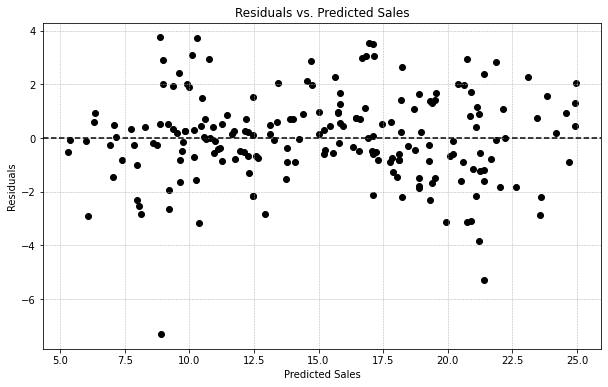

In [18]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the dataset
file_path = '../../../data/04-Regresion/advertising.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Define the independent variables (X) and the dependent variable (y)
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# Adding a constant to the model (for the intercept)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Get the model predictions and residuals
predictions = model.predict(X)
residuals = model.resid

# Plotting residuals vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, color='black')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residuales vs. Prediccion de ventas')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

Este gráfico muestra que no hay un patrón definido.

Hay otros métodos para comprobarlo, como pruebas de correlación o la prueba de Durbin-Watson, pero por lo general la inspección debería ser suficiente para estos casos.

- **Homoscedasticidad: la varianza del error es constante para todos los valores de los regresores.**

El gráfico anterior es útil también para la comprobación de la homoscedasticidad, pero aquí haremos un gráfico adicional con el siguiente código:

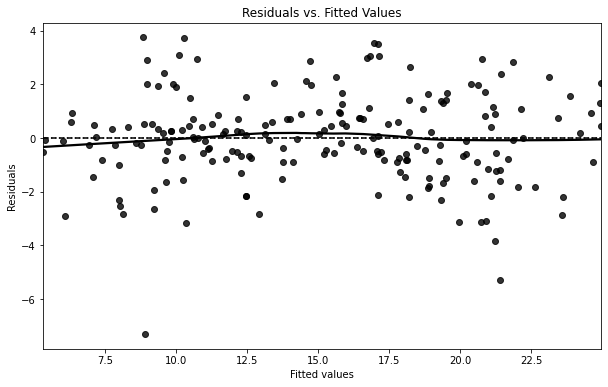

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load the dataset
data = pd.read_csv('../../../data/04-Regresion/advertising.csv')

# Perform linear regression
X = data[['TV', 'Radio', 'Newspaper']]  # Independent variables
y = data['Sales']                       # Dependent variable

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the residuals and fitted values
residuals = model.resid
fitted = model.fittedvalues

# Plotting Residuals vs Fitted values
plt.figure(figsize=(10, 6))
sns.residplot(x=fitted, y=residuals, color='black', lowess=True)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

Este código crea una línea horizontal en el cero, y la línea gruesa muestra la relación entre los residuales y los valores ajustados. De nuevo, el gráfico no muestra una tendencia clara (esto es bueno!). En general, una inspección visual del diagrama de dispersión nos ayuda a entender lo que está pasando.

<div style="display: flex;">
  <div style="flex: 50%;">
    <!-- Text content goes here -->
    <p>La imagen de la derecha muestra la diferencia de manera visual. Una diferencia significativa en el tamaño de los residuales a lo largo de las predicciones indica problemas de heteroscedasticidad. El siguiente código genera el diagrama de dispersión de nuestros datos.</p>
  </div>
  <div style="flex: 50%;">
    <!-- Image content goes here -->
    <img src="../../figures/_heteroscedasticidad._001.png" alt="Comparacion de las predicciones" style="width: 100%;"/>
  </div>
</div>

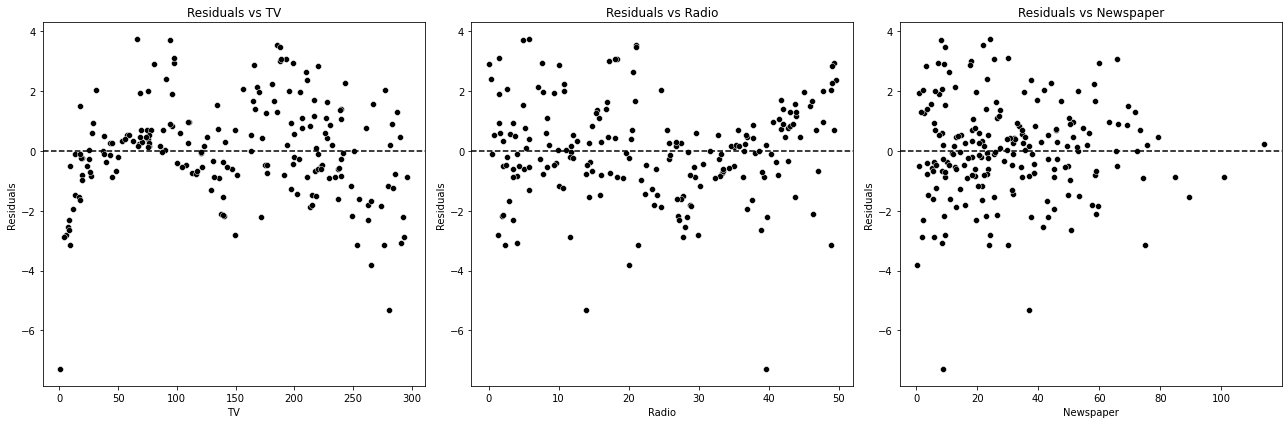

In [21]:
# Correcting the Residuals vs Predictors plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plotting for each predictor
for i, col in enumerate(['TV', 'Radio', 'Newspaper']):
    sns.scatterplot(x=data[col], y=residuals, color='black', ax=axes[i])
    axes[i].set_title(f'Residuals vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Residuals')
    axes[i].axhline(y=0, color='black', linestyle='--')

plt.tight_layout()
plt.show()

Decir “una diferencia significativa” es subjetivo. La diferencia que unos ven pequeña otros la ven muy grande. Por eso, lo más seguro es usar una prueba estadística. El siguiente código usa la prueba Breusch-Pagan para comprobar nuevamente que no hay heteroscedasticidad. 

In [22]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Aplicar una prueba de Breusch-Pagan
bp_test = het_breuschpagan(residuals, model.model.exog)

# Extraer los resultados
bp_test_statistic, bp_test_pvalue = bp_test[:2]

bp_test_statistic, bp_test_pvalue

(3.9785268214219682, 0.26379220043199536)

Como el p-value es mayor a 0.05, no podemos rechazar la hipótesis nula de homoscedasticidad. En otras palabras, no hay evidencia de heteroscedasticidad en los residuales del modelo.

## Cómo interpretar el reporte de regresión: La guía del economista principiante para que acepten su primer artículo

Hay dos usos para un modelo de regresión: predicción o inferencia.

Lo que es importante

En la sección pasada pasamos por todas las pruebas de hipótesis **antes de ver los resultados de la regresión.** Lo hicimos de esta manera porque una vez cumplimos con los supuestos, podemos enfocarnos en las estimaciones de los parámetros en el modelo.

Haremos entonces una regresión lineal del modelo:

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \varepsilon
$$

Donde $y$ son las ventas y $x_1$, $x_2$ y $x_3$ representan los diferentes medios de publicidad. Este modelo ya tiene suficientes dimensiones para que no sea posible mostrarlo en un gráfico de dispersión como al inicio, pero el principio es exactamente el mismo y no le tememos a las dimensiones superiores.

Usa este código en python para hacer tu primera regresión por mínimos cuadrados. Verás un reporte de regresión como el siguiente.

In [25]:
import statsmodels.api as sm

# Definir las variables independientes (X) y la variable dependiente (y)
X = data[['TV', 'Radio', 'Newspaper']]  # Variables independientes
y = data['Sales']                       # Variable dependiente

# Añadir una constante al modelo (intercepción)
X = sm.add_constant(X)

# Realizar la regresión OLS
model = sm.OLS(y, X).fit()

# Mostrar el informe completo de la regresión
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Wed, 07 Feb 2024   Prob (F-statistic):           8.13e-99
Time:                        10:42:10   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Vamos a interpretarlo parte por parte.

La primera sección es un reporte general de cómo fue la regresión, el número de observaciones y el tipo de modelo. También hay algunos estadísticos a los que debemos de poner atención:

- **R cuadrada y R cuadrada ajustada.** Indican el ajuste de los datos a la linea de regresión. El ajuste indica que tan cercanos están los datos a la línea de regresión. Ten cuidado con este indicador y ponlo en contexto, pues en ocasiones el ajuste no significa por sí mismo que sea un mejor modelo. Y al contrario, un mal ajuste no significa necesariamente que sea un modelo que debamos descartar.

Una $R^2$ de 0.903 significa que un 90.3% de la variación en las ventas se explica por el modelo. Nada mal. 

El $R^2$ es un número que va del 0 al 1. Números cercanos al 0 significan que no hay ajuste y números cercanos al 1 indican mucho ajuste. El $R^2$ ajustado toma en consideración el número de predictores en el modelo. Es una visión más precisa.

- **El estadístico $F$ y Prob(estadístico F)**. El estadístico F prueba la hipótesis nula de que todos los coeficientes de regresión son igual a cero. Un estadístico $F$ grande (605.4) indica que esta hipótesis nula es falsa.

No existe una regla clara sobre cuando el valor de $F$ sea inequívocamente grande. Depende mucho del modelo. Por su parte, la probabilidad `Prob(F-statistic)` es un número muy pequeño, cercano a cero. Como podrás intuir, si es una probabilidad, debe estar entre cero y uno. Indica la probabilidad de observar un valor del estadístico de $F$ tan extremo (o más) que el que observamos, asumiendo que la hipótesis nula sea verdadera. Es decir: si todos los coeficientes fueran cero, ¿podría $F$ hacer esto?

- **Grados de libertad.** `Df` y `Df Residual` quieren decir “degrees of freedom” o grados de libertad. Se refiere al número de observaciones menos el número de parámetros estimados. En este modelo no es algo que nos pueda causar problema, porque sólo usamos 3 parámetros, pero en modelos más complejos puede ayudarnos a identificar problemas de sobreajuste.
- **AIC y BIC.** Significan respectivamente: “criterio de información de akaike” y “criterio de información bayesiano”.  Estos son criterios que se usan para la selección de modelos, no para comprobar su significancia. Usaremos estos cuando tengamos que hacer una comparación entre modelos. Incluí una explicación en el apéndice para explicar esto a más detalle.

La segunda sección del reporte muestra los coeficientes de la regresión y

**Esta es la sección del reporte de regresión a la que debes poner atención para interpretar los resultados y determinar si son significativos.**

Veamos cada elemento paso a paso en un modelo lineal sencillo que determina el valor de las ventas (y) en función del gasto en publicidad en medios como TV, Radio o Periódicos (antes de las redes sociales).

**Columna #1: coeficientes.** Esta es la que determina el valor de tus betas en el modelo de regresión. const = 4.6251 significa que beta cero es igual a 4.62.

En un modelo lineal significa que si el gasto en publicidad fuera cero, aún tendríamos ventas de cuatro mil seiscientas unidades aproximadamente.

El resto de los coeficientes indican la contribución marginal que tiene cada medio a las ventas. De aquí podemos ver que la TV es la que contribuye más a las ventas. Cada 20 dólares gastados en publicidad en TV contribuye a 1 (mil) unidades vendidas.

**Columna #2: Errores estándar.** Es el ruido de nuestros datos en el modelo. Entre más grande sea el error estándar, menos significativo sera el modelo.

Para determinar si un error estándar es grande o pequeño, es necesario compararlo con los coeficientes. Un coeficiente de 0.0544 hace que un error estándar de 0.001 sea pequeño en comparación. Pero si el coeficiente fuera también de 0.001, entonces esos datos muy seguramente no serán significativos.

Si esta comparación aún te parece subjetiva, para eso está la t en la siguiente columna.

**Columna #3: Estadístico t.** Algunas veces lo verás como t de Student. Es una razón entre la *señal* y el *ruido*. La señal en una regresión es el coeficiente, y el ruido es el error estándar.

Un tamaño de muestra más grande hace que la señal sea más poderosa. El estadístico t es un número positivo o negativo. Entre más grande sea su valor absoluto, más probable es que los resultados sean significativos.

Esto lo verificamos con el p-value en la siguiente columna.

**Columna #4: p-value.** Es una medida de probabilidad que se obtiene a partir del estadístico t. Indica la probabilidad de obtener un resultado al menos tan extremo como el que observamos, bajo el supuesto de que la hipótesis nula (beta = 0) sea verdad.

Hay una convención de que un p-value menor a 0.05 implica que los resultados son significativos.

Mi consejo es que lo consideres, lo apliques, pero no te cases con esta idea. Después de todo, no hay razón científica que diga que a partir de 0.05 el resultado es significativo por completo.

Cuando adquieres más experiencia en estadística, tomas en contexto el p-value con los intervalos de confianza.

**Columnas #5 y #6: Intervalos de confianza.** Son el rango en el que se encuentra el verdadero valor del parámetro beta.

Recuerda que los coeficientes son estimaciones que obtenemos a partir de una muestra. El intervalo de confianza te muestra un rango.

Nota que la columna #5 muestra un número más bajo que el coeficiente y la columna #6 uno más alto. Entre más amplio sea el intervalo, más incertidumbre hay respecto al valor del coeficiente.

Al contrario, un intervalo más angosto significa más  certidumbre.

En otras palabras, tenemos un 95% de certidumbre de que el efecto de los anuncios por TV tienen un efecto en las ventas que va de 0.052 a 0.057 (miles de unidades/dólar).

## ¿Qué pasa si mi regresión no cumple con los supuestos?

Mi ejemplo de datos se ve muy bonito. Todo funcionó muy bien.

Pero tú y yo sabemos que eso no es lo que pasará cuando lo intentes hacerlo por tu cuenta y con tus propios datos. ¡No eres tú! yo mismo no apostaría a que mi próxima regresión saldrá sin problemas. Gajes del oficio.

La verdad es que es algo muy común. La estrategia que debes tomar depende mucho del problema al que te estás enfrentando. 

Conoce la teoría a profundidad. Todo lo demás lo puede hacer la computadora.

Algunas acciones que puedes tomar si tu regresión no cumple con los supuestos.

- Revisa la especificación del modelo.
- Transforma los datos.
- Usa técnicas robustas.
- Incorpora variables adicionales o interacciones.
- Considera métodos no paramétricos.

## Apéndice: Algunas preguntas que te pudieron haber quedado, explicadas con más detalle

### ¿Por qué $\mathbf{e}'\mathbf{e}$ es la suma de residuos al cuadrado?

En primer lugar, no se debe confundir con $\mathbf{e}\mathbf{e}'$, que es la matriz de varianza-covarianza de los residuales. Si ponemos $\mathbf{e}'\mathbf{e}$ como vectores, se ve claramente que el resultado es una suma de residuales al cuadrado.

$$
\begin{bmatrix}    e_1 & e_2 & \dots & e_n\end{bmatrix}_{1\times n}\begin{bmatrix}    e_1 \\    e_2 \\    \vdots \\    e_n\end{bmatrix}_{n\times 1}= \begin{bmatrix}    e_1 \times e_1 + e_2 \times e_2 + \dots + e_n \times e_n\end{bmatrix}_{1\times 1}
$$

### Guía breve de diferenciación con matrices

Sean $a$ y $b$ vectores de tamaño $K\times 1$.

$$
\frac{\partial a'b}{\partial b} = \frac{\partial b'a}{\partial b} = a
$$

Sea $A$ una matriz simétrica. 

$$
\frac{\partial b' Ab}{\partial b} = 2Ab = 2b'A
$$

Por lo tanto

$$
\frac{\partial 2 \boldsymbol{\beta}'\mathbf{X}'\mathbf{y}}{\partial b} = \frac{\partial 2 \boldsymbol{\beta}'(\mathbf{X}'\mathbf{y})}{\partial b} = 2 \mathbf{X}'\mathbf{y}
$$

y

$$
\frac{\partial \boldsymbol{\beta}'\mathbf{X}'\mathbf{X} \boldsymbol{\beta}}{\partial b} = \frac{\partial \boldsymbol{\beta}'A\boldsymbol{\beta}}{\partial b} = 2 A \boldsymbol{\beta} = 2 \mathbf{X}'\mathbf{X}\boldsymbol{\beta}
$$

donde $\mathbf{X}'\mathbf{X}$ es una matriz de $K\times K$.

### ¿Cómo que la inversa de $\mathbf{X}’\mathbf{X}$ podría no existir?

La inversa de una matriz  X'X (donde X' es la transposición de la matriz  X  y X'X es el producto matricial de X' con X) podría no existir si la matriz no es invertible.

Aquí hay algunas razones por las cuales  X'X podría no ser invertible:

1. **Columnas linealmente dependientes**: Si la matriz X tiene columnas que son combinaciones lineales de otras columnas (es decir, multicolinealidad perfecta), entonces X'X no será de rango completo y por lo tanto no tendrá una inversa.
2. **Insuficientes observaciones**: Si hay menos observaciones que variables (es decir, la matriz X tiene más columnas que filas), entonces X'X será de rango deficiente y no invertible.
3. **Datos duplicados o insuficientemente variados**: Si las filas de X son todas iguales o hay una falta de variabilidad suficiente en los datos, esto también puede conducir a una matriz X'X que no sea invertible.

Para asegurar la invertibilidad de X'X en un análisis de regresión, a menudo se requiere que la matriz X tenga rango completo, lo que significa que todas las columnas de X deben ser linealmente independientes y debe haber un número suficiente de observaciones no duplicadas.

### ¿Cómo funciona el coeficiente de correlación?

El coeficiente de correlación es un número que va de -1 a 1 y ayuda a entender que tan relacionada está una variable con la otra. 

Aquí algunas reglas generales.

- El signo indica la dirección de la correlación. Un coeficiente positivo indica qué cuándo una variable aumenta, la otra también lo hace. Lo contrario pasa con una correlación negativa. Por ejemplo, podríamos encontrar una correlación positiva entre el calor y las ventas de helado. Por el contrario,

### VIF: Factor de inflación de la varianza

El Factor de Inflación de la Varianza (VIF, por sus siglas en inglés) es una medida que cuantifica el grado de multicolinealidad en un modelo de regresión lineal. La multicolinealidad ocurre cuando dos o más variables predictoras en un modelo están altamente correlacionadas, lo que puede llevar a problemas en la estimación de los coeficientes del modelo, así como a interpretaciones erróneas de los efectos de cada variable predictora.

### ¿Cómo funciona el VIF?

El VIF evalúa cuánto se incrementa la varianza de un coeficiente de regresión debido a la multicolinealidad. Se calcula para cada variable predictora y se basa en el nivel en el que esa variable predictora está correlacionada con las otras variables predictoras en el modelo.

El VIF de una variable se calcula de la siguiente manera:

1. Se realiza una regresión lineal donde la variable en cuestión es tratada como la variable dependiente y todas las demás variables predictoras como las independientes.
2. Se calcula el coeficiente de determinación ($R^2$) de esta regresión.
3. El VIF se calcula como $VIF= \frac{1}{1-R^2}$.

### Interpretación del VIF:

- Un VIF de 1 indica que no hay correlación entre la variable predictora en cuestión y las demás.
- Un VIF entre 1 y 5 sugiere una correlación moderada, pero generalmente no es lo suficientemente severa como para requerir atención.
- Un VIF mayor a 5 puede indicar una correlación problemática y podría necesitar atención, dependiendo del contexto y del nivel de precisión necesario en el análisis.
- Un VIF mayor a 10 es comúnmente considerado un indicador claro de multicolinealidad severa.

### Importancia del VIF:

El VIF es una herramienta útil para detectar multicolinealidad en los modelos de regresión lineal. Al identificar las variables con VIFs altos, los analistas pueden considerar eliminar estas variables, combinarlas con otras, o utilizar técnicas estadísticas para manejar la multicolinealidad y así mejorar la calidad y la interpretación del modelo de regresión.

## ¿Por qué es importante identificar la multicolinealidad?

La multicolinealidad en los modelos de regresión lineal es problemática por varias razones:

1. **Estimaciones Inestables de los Coeficientes**: Cuando las variables predictoras están altamente correlacionadas, pequeñas variaciones en los datos pueden llevar a grandes cambios en los coeficientes de las variables. Esto hace que los coeficientes sean poco fiables y difíciles de interpretar.
2. **Confianza Reducida en la Significancia de las Variables**: La multicolinealidad puede inflar las varianzas de los coeficientes de las variables predictoras. Esto significa que incluso si una variable es importante en la predicción de la variable dependiente, es posible que no aparezca como significativa en la regresión debido a la alta varianza de su coeficiente.
3. **Interpretaciones Difíciles**: Cuando las variables predictoras están altamente correlacionadas, se vuelve complicado discernir el efecto individual de cada variable sobre la variable dependiente. Esto es porque los efectos de las variables correlacionadas se superponen y se confunden entre sí.
4. **Modelos Sobreajustados**: La multicolinealidad puede llevar a modelos sobreajustados, especialmente si hay un número excesivo de variables predictoras correlacionadas. Un modelo sobreajustado funciona bien con los datos de entrenamiento pero tiende a tener un rendimiento pobre con nuevos datos no vistos.
5. **Dificultad en la Selección de Modelos**: En la presencia de multicolinealidad, es difícil determinar cuál variable debe ser incluida o excluida del modelo. Los criterios de selección de modelos, como el criterio de información Akaike (AIC) o el criterio de información bayesiano (BIC), pueden verse afectados por la multicolinealidad.

Por estas razones, es importante detectar y abordar la multicolinealidad en la fase de análisis de datos para asegurar que el modelo de regresión sea confiable, interpretable y útil para la toma de decisiones.

### El supuesto de media condicional cero

Este es el supuesto más crítico de la regresión lineal.

Se le llama el supuesto de media condicional cero. Establece que los regresores no deben estar correlacionados con el término de error.

En otras palabras: no hay Endogeneidad.

En la práctica, implica es que no debe existir ningún patrón en los residuales. No se debe ver que generen patrones lineales o cuadráticos de ningún tipo.

¿Cómo se soluciona la Endogeneidad en caso de existir?

Imaginemos que al graficar los residuales vs las predicciones encontramos una relación lineal. Eso implica que en los residuales hay escondida una variable.

Si conocemos lo suficiente sobre nuestras variables podemos encontrar la variable (o una buena proxy) que nos ayude a explicar mejor el comportamiento de nuestra variable de interés.

El truco es entonces:

1. Regresar a la teoría y encontrar la variable que falta.
2. Incluir la variable o una proxy apropiada al modelo de regresión.
3. Volver a hacer las pruebas.

Si en la nueva prueba ya no hay Endogeneidad, se ha solucionado el problema y podemos usar los resultados.

## Un poco extra sobre Gauss

Gauss es uno de los matemáticos más famosos con justa razón. Se le conoce como “el príncipe de las matemáticas”, por sus grandes contribuciones al álgebra, al análisis, la astronomía y la física.

Hay historias increíbles sobre Gauss. Se dice que a los tres años ya le corregía las matemáticas a su papá y que logró descifrar la fecha exacta de su nacimiento años después de que su madre lo olvidó.

Pero la historia más conocida sobre la infancia de Gauss es la de aquella vez que un maestro les dejó la agobiante tarea de [sumar todos los números del 1 al 100](https://www.americanscientist.org/article/gausss-day-of-reckoning).

La intención del maestro era mantener quietos a los niños por media hora. Gauss llegó casi al instante con la respuesta.

Para llegar al cálculo notó que sumar 100 + 1 daba el mismo resultado que sumar 99 + 2: 101. Este mismo resultado se generaba en todos los 50 pares que se forman en la suma. Por lo tanto el resultado era 101 x 50 = 5050.

Es un resultado brillante que además se puede generalizar para cualquier número. La suma consecutiva de los números de 1 a $n$ por lo tanto sería:

$$
\sum_{i = 1}^n i =n (n+1)/2
$$

### Pruebas de hipótesis

Las pruebas de hipótesis son un componente fundamental en la estadística y la investigación científica. Aquí está una explicación detallada de su concepto y uso:

**¿Qué son las Pruebas de Hipótesis?**

Las pruebas de hipótesis son procedimientos estadísticos que se utilizan para determinar si hay suficiente evidencia en una muestra de datos para inferir que una condición particular es verdadera para toda la población. Estas pruebas se basan en dos hipótesis: la hipótesis nula ($H_0$) y la hipótesis alternativa ($H_1$ o $H_a$). La hipótesis nula generalmente representa una afirmación de no efecto o de estado normal, mientras que la hipótesis alternativa representa lo que el investigador busca probar.

**Por qué son importantes las Pruebas de Hipótesis**

1. **Validación de Resultados**: Permiten validar si un resultado observado en los datos es debido a una variación aleatoria o a un efecto real.
2. **Control de Errores**: Las pruebas de hipótesis controlan las probabilidades de cometer errores de tipo I (falsos positivos) y tipo II (falsos negativos).

**Uso en el Modelo de Regresión Lineal por Mínimos Cuadrados**

En un modelo de regresión lineal, las pruebas de hipótesis se utilizan para probar supuestos clave:

1. **Linealidad**: La relación entre las variables independientes y la variable dependiente es lineal. Esto se puede probar visualmente o mediante pruebas estadísticas.
2. **Independencia de los Residuos**: Los residuos (diferencias entre los valores observados y los predichos) deben ser independientes. Esto a menudo se verifica con la prueba de Durbin-Watson.
3. **Homocedasticidad**: Los residuos deben tener varianzas constantes. Esto se puede verificar con pruebas como la de Breusch-Pagan.
4. **Normalidad de los Residuos**: En muchos casos, se asume que los residuos siguen una distribución normal, especialmente importante para pequeñas muestras. Se pueden usar pruebas como la de Shapiro-Wilk para verificar esto.
5. **Ausencia de Multicolinealidad**: Se debe asegurar que las variables independientes no estén altamente correlacionadas entre sí. Esto se puede probar con el factor de inflación de la varianza (VIF).

## Suscríbete al newletter

<iframe src="https://metrics4business.substack.com/embed" width="480" height="320" style="border:1px solid #EEE; background:white;" frameborder="0" scrolling="no"></iframe>